<a href="https://colab.research.google.com/github/mottasilvia/UCU-NLP/blob/main/PLN_Actividad_4_StopWords_Ariel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

import urllib.request
url = "https://www.gutenberg.org/cache/epub/22899/pg22899.txt"
response = urllib.request.urlopen(url)
raw_text = response.read().decode('utf-8-sig')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# navegando la url se ve que al inicio se incluye texto del sitio gutenberg, prólogo, etc, se busca "Aquella tarde, el viejo y venerado maestro"
start_marker = "Aquella tarde, el viejo y venerado maestro"
start_index = raw_text.find(start_marker)
text_content = raw_text[start_index:].strip()

In [ ]:
# también se ve que luego del libro se incluye información del proyecto Gutemberg y su licencia
# se busca *** END OF THE PROJECT GUTENBERG EBOOK ARIEL *** para terminar
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK ARIEL ***"
end_index = text_content.find(end_marker)
text_content = text_content[:end_index].strip()

In [ ]:
print(text_content[:1000])
print("...")
print(text_content[len(text_content)-1000:])

Aquella tarde, el viejo y venerado maestro, a quien solían llamar
Próspero, por alusión al sabio mago de _La Tempestad_ shakespiriana, se
despedía de sus jóvenes discípulos, pasado un año de tareas,
congregándolos una vez más a su alrededor.

Ya habían llegado ellos a la amplia sala de estudios, en la que un gusto
delicado y severo esmerábase por todas partes en honrar la noble
presencia de los libros, fieles compañeros de Próspero. Dominaba en la
sala--como numen de su ambiente sereno--un bronce primoroso que figuraba
al ARIEL de _La Tempestad_. Junto a este bronce se sentaba habitualmente
el maestro, y por ello le llamaban con el nombre del mago a quien sirve
y favorece en el drama el fantástico personaje que había interpretado el
escultor. Quizá en su enseñanza y su carácter había, para el nombre, una
razón y un sentido más profundos.

Ariel, genio del aire, representa, en el simbolismo de la obra de
Shakespeare, la parte noble y alada del espíritu. Ariel es el imper
...
ano de una 

In [ ]:
# funciones de cálculo de frecuencias y graficado

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re

# separar el texto en palabras para contar la frecuencia de cada una y devolver tuplas (palabra,frecuencia)
# si se agrega una lista de palabras a incluir solo se devuelven esas palabras si aparecen en el texto
# si se agrega una lista de palabras a excluir las mismas no se devolverán por más que estén en el texto
# si una misma palabra está en la lista de incluir y en la lista de excluir entonces será excluida
def calculate_frequency(texto, palabras_incluir = None, palabras_excluir = None):
  words = re.findall(r'\b\w+\b', texto.lower())
  if palabras_incluir is not None:
    words = [word for word in words if word in palabras_incluir]
  if palabras_excluir is not None:
    words = [word for word in words if word not in palabras_excluir]

  word_freq = Counter(words)

  return word_freq.most_common()



# ver las frecuencias como barras o puntos ('bar' o 'scatter') y marcar visualmente límites mínimo y máximo.
def plot_frequency(data, plot_type='scatter', min_percentile=10, max_percentile=90):
    # Extracción de los valores numéricos
    values = [val for _, val in data]

    # Calculando la suma acumulativa y la suma total
    cumulative_values = np.cumsum(values)
    total_sum = cumulative_values[-1]

    # Calculando los umbrales para los percentiles acumulativos
    lower_threshold = total_sum * (min_percentile / 100)
    upper_threshold = total_sum * (max_percentile / 100)

    # Encontrando los índices para los umbrales
    lower_index = np.where(cumulative_values >= lower_threshold)[0][0]
    upper_index = np.where(cumulative_values >= upper_threshold)[0][0]

    # Creación de la gráfica
    plt.figure(figsize=(10, 6))
    if plot_type == 'bar':
        plt.bar(range(len(values)), values, color='skyblue')
    elif plot_type == 'scatter':
        plt.scatter(range(len(values)), values, color='skyblue')

    plt.axvline(x=lower_index, color='red', linestyle='--', label=f'{min_percentile}% Lower Accumulative Threshold')
    plt.axvline(x=upper_index, color='green', linestyle='--', label=f'{max_percentile}% Upper Accumulative Threshold')
    plt.ylabel('Frecuencia')
    plt.title('Frecuencia de palabras')
    plt.xticks([])  # Ocultar las etiquetas del eje x
    plt.legend()
    plt.show()

# grafica de palabras mostrando cantidad y frecuencia acumulada
# se muestran start_n elementos del principio y end_n elementos del final de los datos
def plot_word_distribution_selective(data, start_n=5, end_n=5):
    # Extraer palabras y frecuencias
    words, frequencies = zip(*data)

    # Calcular frecuencias acumuladas
    cumulative_frequencies = np.cumsum(frequencies)
    total_frequency = cumulative_frequencies[-1]
    cumulative_percentages = cumulative_frequencies / total_frequency * 100  # Convertir a porcentajes

    # Seleccionar elementos según start_n y end_n
    selected_words = []
    selected_frequencies = []
    selected_cumulative_percentages = []

    if start_n > 0:
        selected_words.extend(words[:start_n])
        selected_frequencies.extend(frequencies[:start_n])
        selected_cumulative_percentages.extend(cumulative_percentages[:start_n])

    if end_n > 0:
        selected_words.extend(words[-end_n:])
        selected_frequencies.extend(frequencies[-end_n:])
        selected_cumulative_percentages.extend(cumulative_percentages[-end_n:])

    # Configurar gráfico
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Graficar frecuencias
    color = 'tab:blue'
    ax1.set_xlabel('Palabras')
    ax1.set_ylabel('Frecuencia', color=color)
    ax1.bar(selected_words, selected_frequencies, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticklabels(selected_words, rotation=45, ha='right')

    # Crear un segundo eje para las frecuencias acumuladas en porcentaje
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Frecuencia acumulada (%)', color=color)
    ax2.plot(selected_words, selected_cumulative_percentages, color=color, marker='o', linestyle='dashed', linewidth=2, markersize=5)
    ax2.tick_params(axis='y', labelcolor=color)

    # Mostrar gráfico
    plt.title('Distribución selectiva de frecuencias de palabras y acumulación en porcentaje')
    plt.show()


In [ ]:
# frecuencias sin seleccionar palabras específicas ni quitar stop words
f1 = calculate_frequency(text_content)
print(f1)

[('de', 2105), ('la', 1699), ('que', 800), ('el', 778), ('en', 738), ('y', 699), ('a', 481), ('del', 474), ('las', 408), ('los', 398), ('su', 312), ('una', 309), ('un', 256), ('por', 227), ('se', 195), ('con', 193), ('no', 178), ('es', 173), ('más', 169), ('para', 158), ('lo', 152), ('como', 150), ('al', 149), ('vida', 104), ('espíritu', 103), ('sus', 101), ('ha', 83), ('sobre', 72), ('cuando', 59), ('todo', 58), ('ella', 50), ('pero', 47), ('han', 46), ('alma', 45), ('toda', 43), ('él', 43), ('esa', 43), ('obra', 42), ('civilización', 42), ('mismo', 41), ('o', 41), ('ser', 41), ('le', 39), ('nuestra', 39), ('sin', 39), ('moral', 39), ('ideal', 38), ('sentimiento', 37), ('cultura', 37), ('son', 37), ('pensamiento', 36), ('ni', 35), ('ese', 34), ('democracia', 34), ('sentido', 33), ('naturaleza', 33), ('parte', 32), ('sólo', 32), ('fuerza', 32), ('sino', 32), ('humanas', 31), ('realidad', 31), ('entre', 31), ('todas', 30), ('noble', 30), ('humana', 30), ('donde', 30), ('bien', 29), ('si

In [ ]:
print(f"Cantidad de palabras: {len(f1)}")
palabras_unicas = [x[0] for x in f1 if x[1]==1]
print(f"Cantidad de palabras únicas: {len(palabras_unicas)}")
palabras_raras = [x[0] for x in f1 if x[1]<=3]
print(f"Cantidad de palabras raras: {len(palabras_raras)}")

Cantidad de palabras: 5515
Cantidad de palabras únicas: 3536
Cantidad de palabras raras: 4709


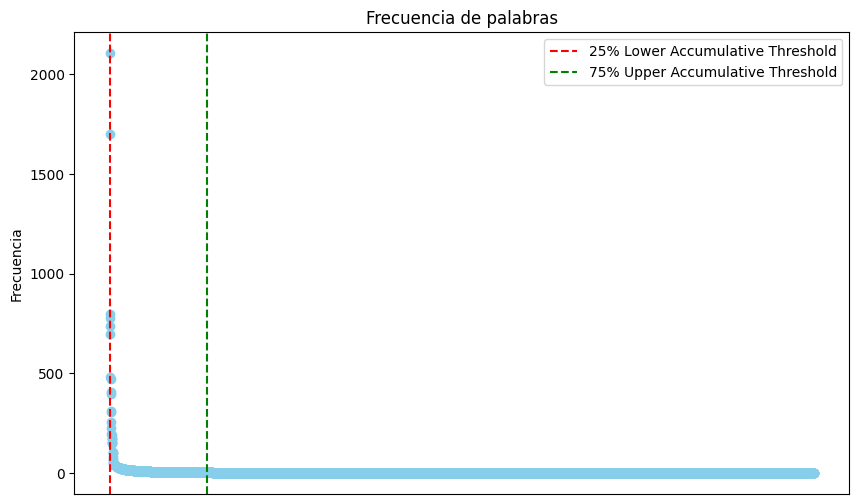

In [ ]:
# visualización de las frecuencias
plot_frequency(f1, 'scatter', 25, 75)

In [ ]:
# Se visualiza que las palabras únicas son muchas (el texto no está lematizado ni stematizado)

<ipython-input-5-3fc1223eb325>:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(selected_words, rotation=45, ha='right')


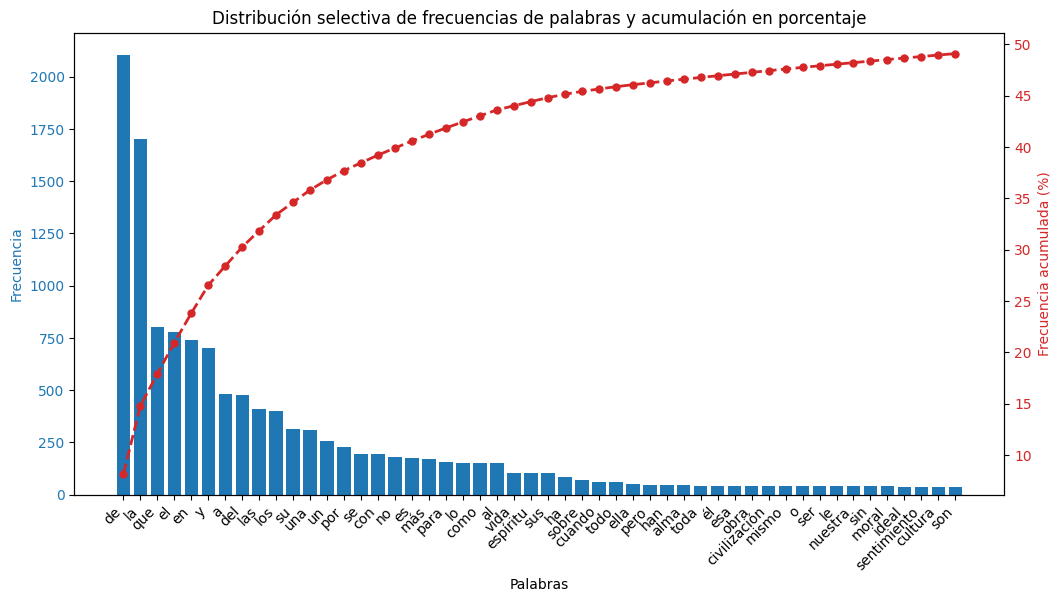

In [ ]:
# visualización de las primeras 50 palabras más frecuentes y su distribución


In [ ]:
# el corte para determinar stop words podría estar en la palabra 23


In [ ]:
stop_words_empiricas = [w[0] for w in f1[:23]]
print(stop_words_empiricas)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'del', 'las', 'los', 'su', 'una', 'un', 'por', 'se', 'con', 'no', 'es', 'más', 'para', 'lo', 'como', 'al']


In [ ]:
# stop words enespañol de nltk
print(set(nltk.corpus.stopwords.words('spanish')))

{'éramos', 'vosotras', 'fuéramos', 'seremos', 'estés', 'estando', 'tuve', 'poco', 'hubiera', 'hube', 'fueras', 'hubieses', 'sobre', 'suyo', 'están', 'estaban', 'la', 'estará', 'estáis', 'entre', 'sentidos', 'estuviese', 'estas', 'estabais', 'tengan', 'estaríamos', 'hubimos', 'fueses', 'tuviste', 'fuerais', 'tendríamos', 'tu', 'esos', 'sois', 'tiene', 'que', 'eran', 'estado', 'seas', 'tendrás', 'estuve', 'ante', 'fuesen', 'algo', 'hubiese', 'les', 'estuvieras', 'haya', 'tienen', 'un', 'el', 'hubiesen', 'durante', 'está', 'habíamos', 'hasta', 'tuviéramos', 'estados', 'no', 'seríamos', 'sean', 'tendrías', 'habría', 'nada', 'muy', 'desde', 'estemos', 'estén', 'estuvimos', 'pero', 'estaréis', 'ni', 'a', 'es', 'sus', 'estarán', 'estuvo', 'habréis', 'estuvieses', 'cuando', 'tengamos', 'una', 'tenía', 'habidos', 'nosotros', 'vosotros', 'muchos', 'tus', 'estarás', 'su', 'mi', 'hemos', 'he', 'le', 'habríamos', 'hay', 'sería', 'habrá', 'estamos', 'han', 'ya', 'somos', 'teníamos', 'quien', 'fuera'

In [ ]:
# stops word empiricas que no están en nltk.corpus.stopwords.words('spanish')
print([w for w in stop_words_empiricas if w not in set(nltk.corpus.stopwords.words('spanish'))])

[]


In [ ]:
# todas ls stop words empíricas están en las de nltk

In [ ]:
# stops word de nltk.corpus.stopwords.words('spanish') que están el texto pero no en stop words empíricas
words = [wf[0] for wf in f1]
print([w for w in set(nltk.corpus.stopwords.words('spanish')) if w in words and w not in stop_words_empiricas])

['poco', 'hubiera', 'sobre', 'suyo', 'están', 'estará', 'entre', 'sentidos', 'estas', 'tengan', 'esos', 'sois', 'tiene', 'eran', 'estado', 'ante', 'algo', 'les', 'haya', 'tienen', 'durante', 'está', 'hasta', 'estados', 'sean', 'habría', 'nada', 'muy', 'desde', 'estén', 'pero', 'ni', 'sus', 'habréis', 'cuando', 'tenía', 'nosotros', 'vosotros', 'muchos', 'mi', 'hemos', 'he', 'le', 'hay', 'sería', 'habrá', 'han', 'ya', 'somos', 'quien', 'fuera', 'seréis', 'sentido', 'contra', 'quienes', 'tanto', 'me', 'habrían', 'teniendo', 'habían', 'son', 'algunos', 'tenían', 'fueron', 'ha', 'esa', 'hayan', 'mía', 'estaba', 'nuestro', 'habéis', 'otro', 'tendréis', 'tendrá', 'ellos', 'otra', 'yo', 'sea', 'esté', 'siente', 'porque', 'eso', 'unos', 'algunas', 'o', 'otras', 'serían', 'esta', 'tenido', 'qué', 'antes', 'nos', 'tengáis', 'había', 'vuestro', 'sin', 'este', 'estos', 'tuvieran', 'sentida', 'nuestros', 'él', 'será', 'tuvo', 'cual', 'mis', 'ellas', 'esas', 'tenga', 'serán', 'hubo', 'era', 'tuvieron

In [ ]:
# conteo de palabras quitando stop words empiricas
f3 = calculate_frequency(text_content, palabras_excluir = stop_words_empiricas)
print(f3)

[('vida', 104), ('espíritu', 103), ('sus', 101), ('ha', 83), ('sobre', 72), ('cuando', 59), ('todo', 58), ('ella', 50), ('pero', 47), ('han', 46), ('alma', 45), ('toda', 43), ('él', 43), ('esa', 43), ('obra', 42), ('civilización', 42), ('mismo', 41), ('o', 41), ('ser', 41), ('le', 39), ('nuestra', 39), ('sin', 39), ('moral', 39), ('ideal', 38), ('sentimiento', 37), ('cultura', 37), ('son', 37), ('pensamiento', 36), ('ni', 35), ('ese', 34), ('democracia', 34), ('sentido', 33), ('naturaleza', 33), ('parte', 32), ('sólo', 32), ('fuerza', 32), ('sino', 32), ('humanas', 31), ('realidad', 31), ('entre', 31), ('todas', 30), ('noble', 30), ('humana', 30), ('donde', 30), ('bien', 29), ('si', 29), ('vez', 28), ('carácter', 28), ('e', 28), ('todos', 28), ('debe', 28), ('ellos', 27), ('puede', 27), ('historia', 27), ('desde', 27), ('dentro', 27), ('ya', 26), ('genio', 26), ('tiempo', 26), ('cada', 26), ('voluntad', 26), ('actividad', 26), ('porvenir', 26), ('vuestra', 25), ('hay', 25), ('sociedad'

In [ ]:
# conteo de palabras quitando stop words de nltk
f3 = calculate_frequency(text_content, palabras_excluir = set(nltk.corpus.stopwords.words('spanish')))
print(f3)

[('vida', 104), ('espíritu', 103), ('alma', 45), ('toda', 43), ('obra', 42), ('civilización', 42), ('mismo', 41), ('ser', 41), ('moral', 39), ('ideal', 38), ('sentimiento', 37), ('cultura', 37), ('pensamiento', 36), ('democracia', 34), ('naturaleza', 33), ('parte', 32), ('sólo', 32), ('fuerza', 32), ('sino', 32), ('humanas', 31), ('realidad', 31), ('todas', 30), ('noble', 30), ('humana', 30), ('bien', 29), ('si', 29), ('vez', 28), ('carácter', 28), ('debe', 28), ('puede', 27), ('historia', 27), ('dentro', 27), ('genio', 26), ('tiempo', 26), ('cada', 26), ('voluntad', 26), ('actividad', 26), ('porvenir', 26), ('sociedad', 25), ('libertad', 24), ('juventud', 23), ('así', 23), ('sociedades', 23), ('pueblo', 23), ('belleza', 22), ('humanidad', 22), ('aquel', 22), ('aun', 22), ('humano', 22), ('acción', 21), ('arte', 21), ('luz', 21), ('siempre', 21), ('igualdad', 21), ('ambiente', 20), ('amor', 20), ('aún', 20), ('américa', 20), ('social', 20), ('material', 20), ('idea', 19), ('ideas', 19)

In [ ]:
# conteo de frecuencias de palabras específicas
f2 = calculate_frequency(text_content, palabras_incluir = ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'se', 'del'])
print(f2)

[('de', 2105), ('la', 1699), ('que', 800), ('el', 778), ('en', 738), ('y', 699), ('a', 481), ('del', 474), ('los', 398), ('se', 195)]


In [ ]:
# función que recibe el texto, listas de palabras a incluir y excluir para luego mostrar frecuencias
# por largo de palabra y por palabras con más frecuencia,
# calcula valores de ley de Pareto y grafica para verificar leyes de Zips y Heaps
def analizarTexto(texto, palabras_incluir = None, palabras_excluir = None):
  palabras = re.findall(r'\b\w+\b', texto.lower())

  if palabras_incluir is not None or palabras_excluir is not None:
      print(f"Cantidad de palabras {len(palabras)}")
      palabras_unicas = [w for w in set(palabras)]
      print(f"Cantidad de palabras únicas: {len(palabras_unicas)}")
      if palabras_incluir is not None:
        print(f"A incluir {len(palabras_incluir)} de las cuales {len([w for w in palabras_incluir if w in palabras])} están en el texto")
      if palabras_excluir is not None:
        print(f"A excluir {len(palabras_excluir)} de las cuales {len([w for w in palabras_excluir if w in palabras])} están en el texto")
      print("Luego de de filtrar:")

  if palabras_incluir is not None:
    palabras = [palabra for palabra in palabras if palabra in palabras_incluir]
  if palabras_excluir is not None:
    palabras = [palabra for palabra in palabras if palabra not in palabras_excluir]

  word_freq = Counter(palabras)

  f1 = word_freq.most_common()

  print(f"Cantidad de palabras: {len(palabras)}")
  print(f"Cantidad de palabras únicas: {len(f1)}")
  palabras_raras = [x[0] for x in f1 if x[1]<=3]
  print(f"Cantidad de palabras raras: {len(palabras_raras)}")

  length_count = Counter([len(wf[0]) for wf in f1])
  length_count = sorted(length_count.items())

  lengths, counts = zip(*length_count)
  plt.figure(figsize=(12, 6))
  plt.bar(lengths, counts, color='blue')
  plt.xlabel('Largo de la palabra')
  plt.ylabel('Cantidad de palabras')
  plt.title('Distribución de la cantidad de palabras por largo')
  plt.xticks(range(1, max(lengths)+1))  # Asegurarse de que todos los largos estén etiquetados
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

  plot_word_distribution_selective(f1,start_n=50, end_n=0)

  print("Ley de Pareto")
  total_words = len(f1)
  cumulative_freq = []
  cf = 0
  for wf in sorted(f1, key=lambda x: x[1]):
    cf = cf+wf[1]
    cumulative_freq.append((wf[0],cf))

  # Porcentaje de palabras distintas que son el 80% del total
  pareto_limit_80 = int(cf * 0.8)
  pareto_words_80 = [wcf[0] for wcf in cumulative_freq if wcf[1] > pareto_limit_80]
  pareto_percentage_80 = (len(pareto_words_80) / total_words) * 100
  print(f"Porcentaje de palabras distintas que son el 80% del total: {pareto_percentage_80:.2f}%")

  # Porcentaje de palabras distintas que son el 80% del total
  pareto_limit_20 = int(cf * 0.2)
  pareto_words_20 = [wcf[0] for wcf in cumulative_freq if wcf[1] < pareto_limit_20]
  pareto_percentage_20 = (len(pareto_words_20) / total_words) * 100
  print(f"Porcentaje de palabras distintas que son el 20% del total: {pareto_percentage_20:.2f}%")


  print("Ley de Zipf")

  ranks = np.arange(1, len(f1) + 1)
  values = [wf[1] for wf in f1]

  plt.figure(figsize=(10, 6))
  plt.loglog(ranks, values, marker='.', linestyle='None', markersize=5)
  plt.title('Ley de Zipf')
  plt.xlabel('Log(Rango)')
  plt.ylabel('Log(Frecuencia)')
  plt.grid(True)
  plt.show()

  print("Ley de Heaps")
  vocab_size = []
  total_tokens = []
  for i in range(1000, len(palabras), 1000):
      vocab_size.append(len(set(palabras[:i])))
      total_tokens.append(i)

  plt.figure(figsize=(10, 6))
  plt.plot(total_tokens, vocab_size, marker=".")
  plt.title("Ley de Heaps")
  plt.xlabel("Número total de palabras")
  plt.ylabel("Número de palabras distintas")
  plt.show()


Cantidad de palabras: 25681
Cantidad de palabras únicas: 5515
Cantidad de palabras raras: 4709


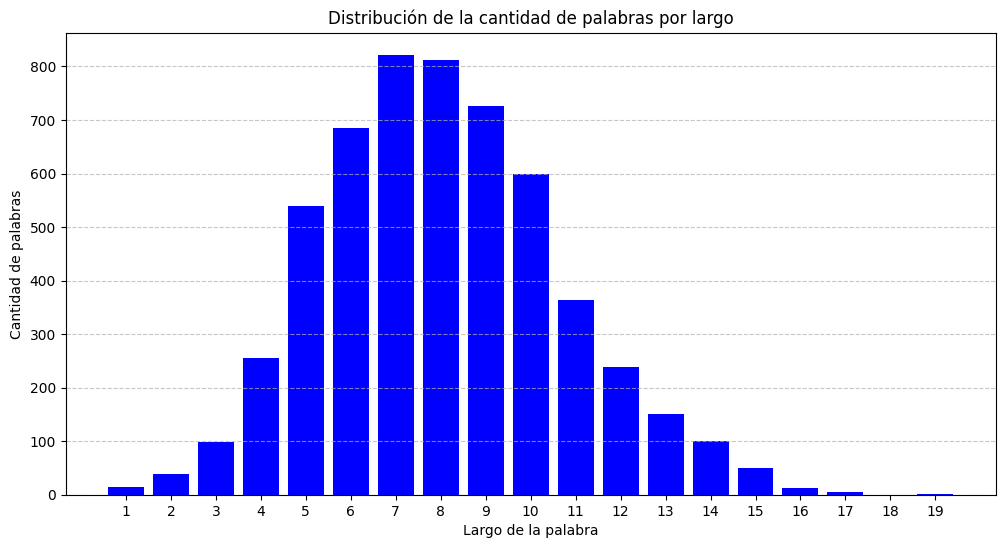

<ipython-input-5-3fc1223eb325>:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(selected_words, rotation=45, ha='right')


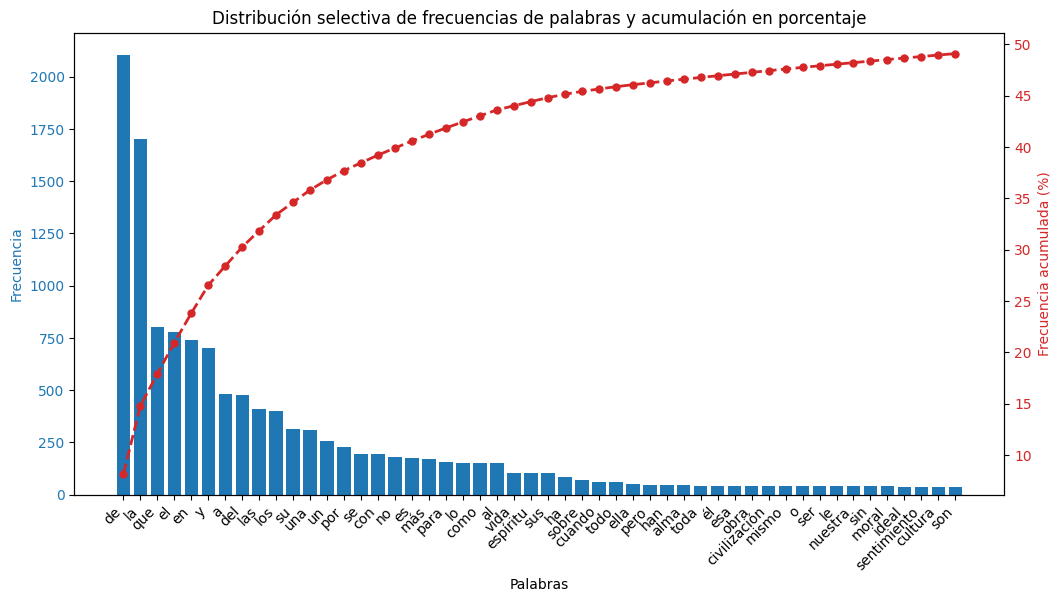

Ley de Pareto
Porcentaje de palabras distintas que son el 80% del total: 0.07%
Porcentaje de palabras distintas que son el 20% del total: 78.60%
Ley de Zipf


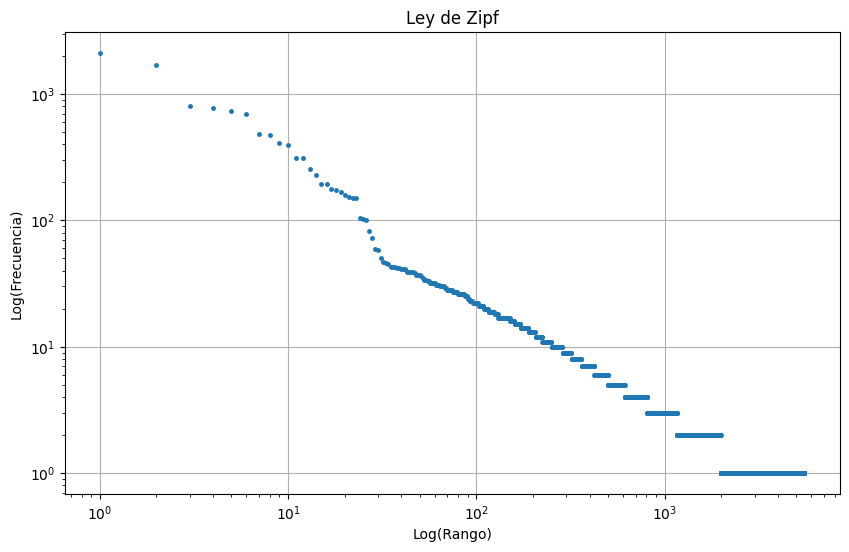

Ley de Heaps


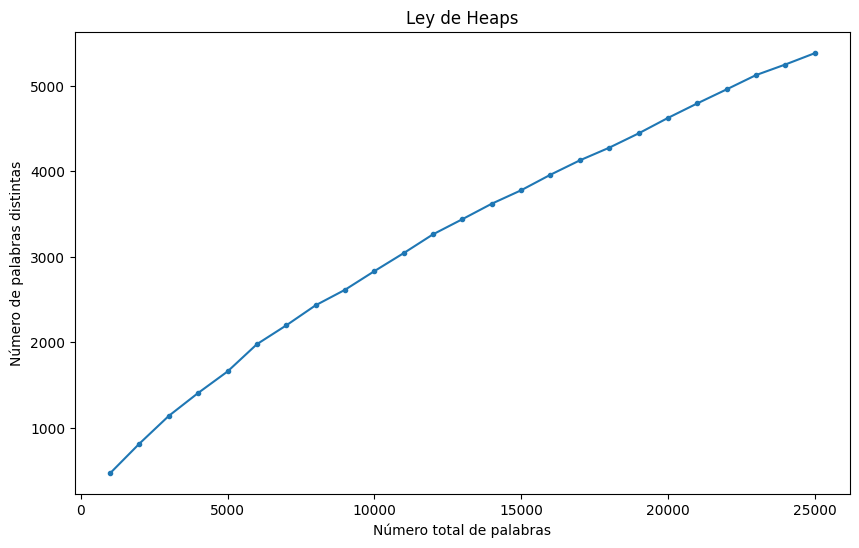

In [ ]:
# análisis del texto completo
analizarTexto(text_content)

In [ ]:
# No se cumple la ley de Pareto, muy pocas palabras acumulan el 80% del texto

# Observando la gráfica para ley de Zips:
# No se ve linealidad

# Observando la gráfica para la ley de Heaps:
# La curva se vuelve casi lineal porque hay muchas palabras de baja frecuencia

Cantidad de palabras 25681
Cantidad de palabras únicas: 5515
A excluir 313 de las cuales 161 están en el texto
Luego de de filtrar:
Cantidad de palabras: 12576
Cantidad de palabras únicas: 5354
Cantidad de palabras raras: 4661


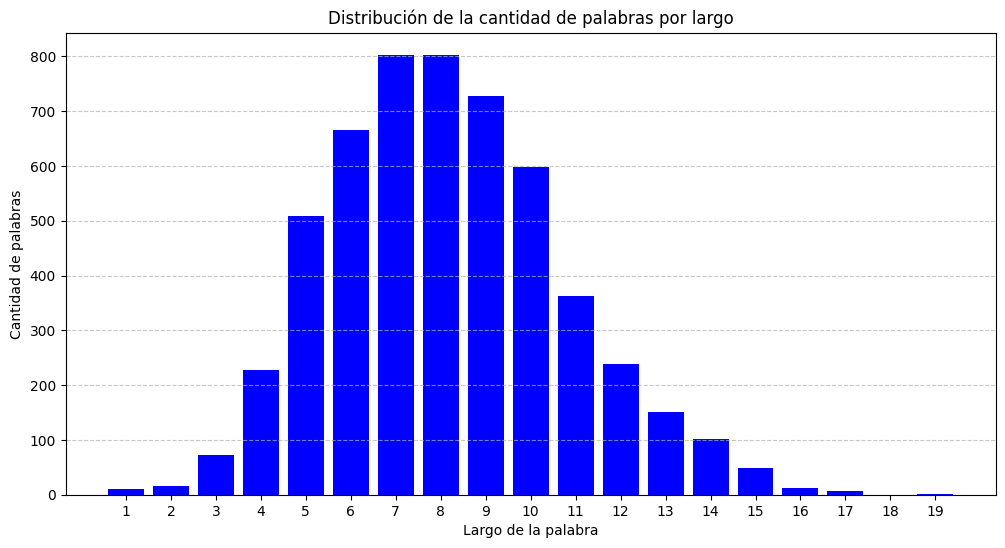

<ipython-input-5-3fc1223eb325>:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(selected_words, rotation=45, ha='right')


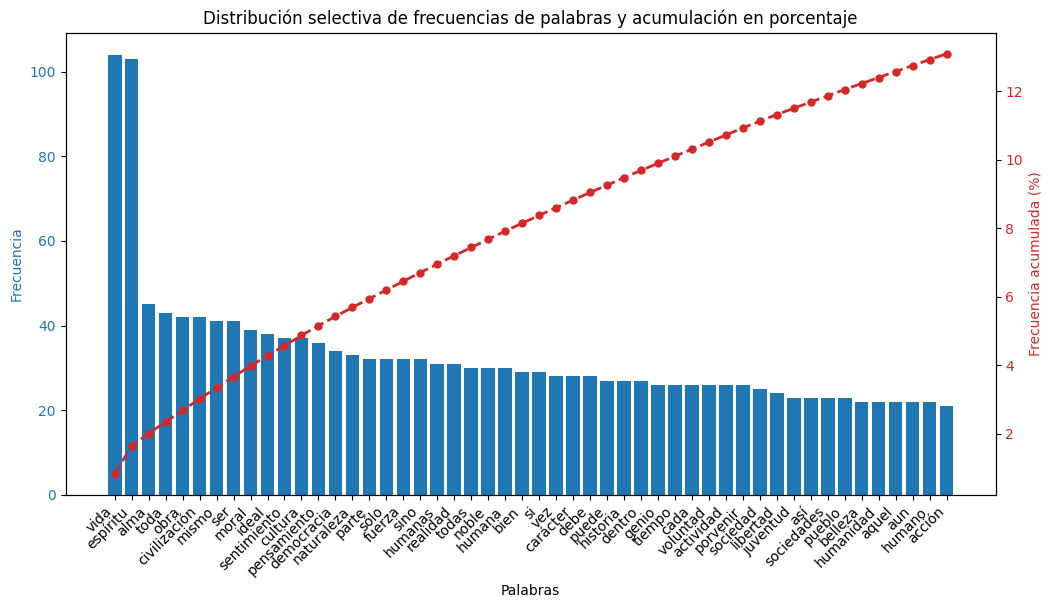

Ley de Pareto
Porcentaje de palabras distintas que son el 80% del total: 1.85%
Porcentaje de palabras distintas que son el 20% del total: 46.96%
Ley de Zipf


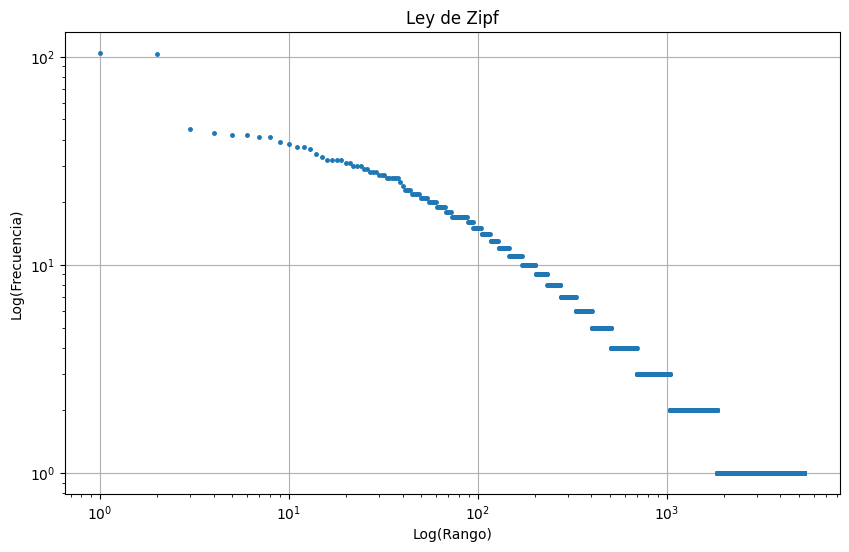

Ley de Heaps


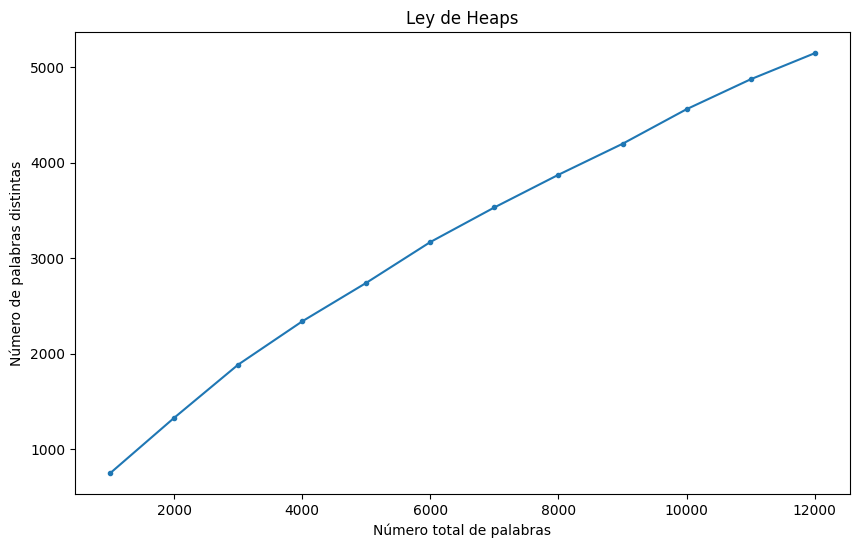

In [ ]:
# análisis del texto sin stop words de nltk en español
analizarTexto(text_content, palabras_excluir = set(nltk.corpus.stopwords.words('spanish')))

In [ ]:
# No se cumple la ley de Pareto, muy pocas palabras acumulan el 80% del texto

# Observando la gráfica para ley de Zips:
# Del lado derecho derecho la gráfica se ve dispersa porque hay pocas palabras con frecuencia muy alta pero se ve linealidad.
# Del lado izquierdo se generan bandas porque hay palabras con baja frecuencia

# Observando la gráfica para la ley de Heaps:
# La curva se vuelve casi lineal porque hay muchas palabras de baja frecuencia